In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
#from keras import regularizers
from keras.optimizers import SGD

In [18]:
X = pd.read_csv('dos_inputtrain - Copy.csv',low_memory=False)
#x_test = pd.read_csv('dos_inputtest - Copy.csv')
Y = pd.read_csv('label_train.csv') 
#label_test = pd.read_csv('label_test.csv')

#X = pd.concat([x_train, x_test], ignore_index=True)
#Y = pd.concat([label_train, label_test], ignore_index=True)

In [19]:
df = X.loc[:, X.dtypes == np.object]

cl = df.columns

In [20]:
from sklearn.experimental import enable_iterative_imputer  
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import OrdinalEncoder,LabelEncoder
from sklearn.ensemble import ExtraTreesRegressor
encoder = OrdinalEncoder()
imputer = IterativeImputer(ExtraTreesRegressor())
le = LabelEncoder()
# create a list of categorical columns to iterate over
def encode(data):
    '''function to encode non-null data and replace it in the original data'''
    #retains only non-null values
    nonulls = np.array(data.dropna())
    #reshapes the data for encoding
    impute_reshape = nonulls.reshape(-1,1)
    #encode date
    impute_ordinal = encoder.fit_transform(impute_reshape)
    #Assign back encoded values to non-null values
    data.loc[data.notnull()] = np.squeeze(impute_ordinal)
    return data

#create a for loop to iterate through each column in the data
for columns in cl:
    encode(X[columns])

C:\anaconda\envs\tf_GPU\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
C:\anaconda\envs\tf_GPU\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [21]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Create a scaler object
sc = StandardScaler()

# Fit the scaler to the features and transform
Xtrain_std = sc.fit_transform(X)

In [22]:
from sklearn import decomposition
# Create a pca object with the k components as a parameter
pca = decomposition.PCA(n_components=6)

# Fit the PCA and transform the data
X_pca = pca.fit_transform(Xtrain_std)

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_pca,Y, test_size=0.2,random_state=0)

In [41]:
model = Sequential([
    Dense(30, activation='relu', input_shape=(6,)),
    Dense(20, activation='relu'),
    Dense(1, activation='sigmoid'),
])
epochs = 20
learning_rate = 0.01
decay_rate = learning_rate / epochs
momentum = 0.8
sgd = SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [42]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_27 (Dense)             (None, 30)                210       
_________________________________________________________________
dense_28 (Dense)             (None, 20)                620       
_________________________________________________________________
dense_29 (Dense)             (None, 1)                 21        
Total params: 851
Trainable params: 851
Non-trainable params: 0
_________________________________________________________________


In [43]:
hist = model.fit(X_train, Y_train,
          batch_size=32, epochs=epochs)

Epoch 1/20
6361/6361 [==============================] - 8s 1ms/step - loss: 0.4736 - accuracy: 0.7679
Epoch 2/20
6361/6361 [==============================] - 8s 1ms/step - loss: 0.4432 - accuracy: 0.7851
Epoch 3/20
6361/6361 [==============================] - 8s 1ms/step - loss: 0.4315 - accuracy: 0.7917
Epoch 4/20
6361/6361 [==============================] - 8s 1ms/step - loss: 0.4248 - accuracy: 0.7954
Epoch 5/20
6361/6361 [==============================] - 8s 1ms/step - loss: 0.4198 - accuracy: 0.7984
Epoch 6/20
6361/6361 [==============================] - 8s 1ms/step - loss: 0.4164 - accuracy: 0.8024
Epoch 7/20
6361/6361 [==============================] - 8s 1ms/step - loss: 0.4134 - accuracy: 0.8036
Epoch 8/20
6361/6361 [==============================] - 8s 1ms/step - loss: 0.4106 - accuracy: 0.8058
Epoch 9/20
6361/6361 [==============================] - 8s 1ms/step - loss: 0.4084 - accuracy: 0.8074
Epoch 10/20
5122/6361 [=======================>......] - ETA: 1s - loss: 0.4078 - 

KeyboardInterrupt: 

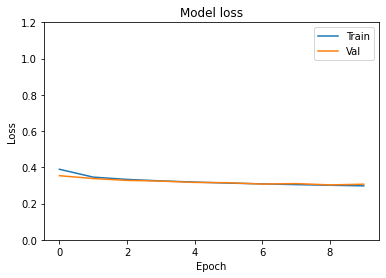

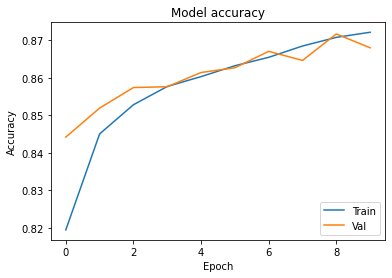

In [30]:
'''
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.ylim(top=1.2, bottom=0)
plt.show()
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()'''


In [37]:
yout = model.predict_classes(X_test)

In [38]:
yout

array([[1],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [39]:
from sklearn.metrics import accuracy_score
print('accuracy = ',accuracy_score(Y_test,yout))

accuracy =  0.8486706360903142


In [15]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, yout)

array([[19199,  6043],
       [ 2532, 23115]], dtype=int64)